 install pandas datareader

In [16]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime


In [18]:
tesla_df=pdr.get_data_yahoo("TSLA")
tesla_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-18,60.167999,59.580002,59.939999,60.049999,15178500.0,60.049999
2017-04-19,61.324001,60.422001,60.492001,61.104000,19490000.0,61.104000
2017-04-20,61.830002,60.046001,61.301998,60.501999,30747000.0,60.501999
2017-04-21,61.279999,60.084000,60.400002,61.119999,22549000.0,61.119999
2017-04-24,62.110001,61.203999,61.844002,61.605999,25417500.0,61.605999


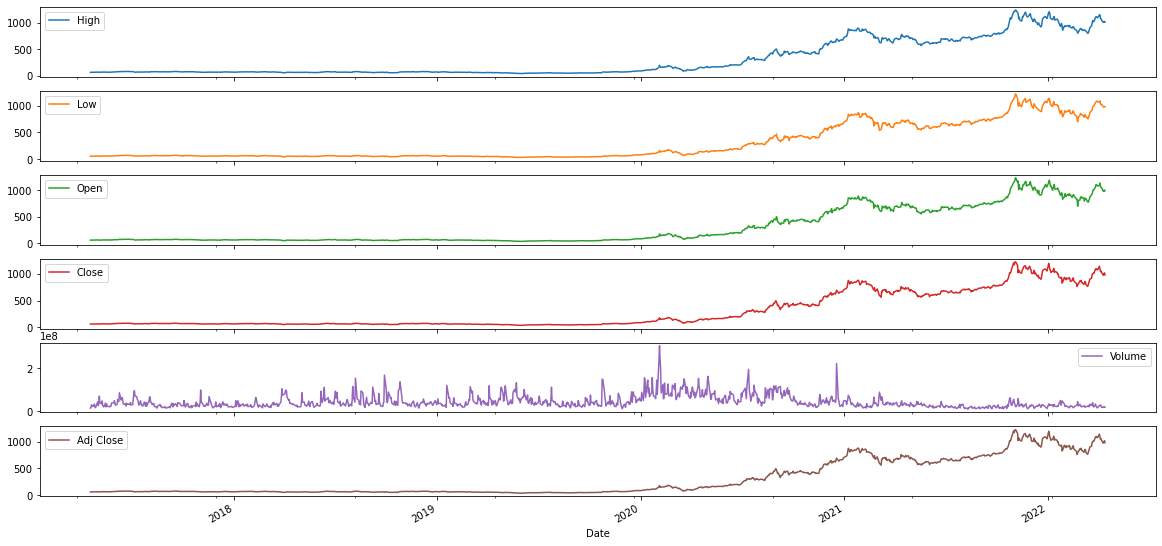

In [27]:
import matplotlib.pyplot as plt
tesla_df.plot(subplots=True, figsize=(20,10))
##plt.tight_layout()
plt.show()


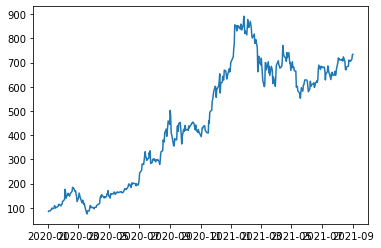

In [20]:
index =tesla_df.loc['2020-01-01':'2021-09-01'].index
share_open = tesla_df.loc['2020-01-01':'2021-09-01']['Open']
fig, axis = plt.subplots()
axis.plot(index, share_open)

In [21]:
tesladf = tesla_df.reset_index()
tesladf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   High       1259 non-null   float64       
 2   Low        1259 non-null   float64       
 3   Open       1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Volume     1259 non-null   float64       
 6   Adj Close  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB


In [22]:
##changing the datetime type to object
pd.to_datetime(tesladf['Date'])

0      2017-04-18
1      2017-04-19
2      2017-04-20
3      2017-04-21
4      2017-04-24
          ...    
1254   2022-04-08
1255   2022-04-11
1256   2022-04-12
1257   2022-04-13
1258   2022-04-14
Name: Date, Length: 1259, dtype: datetime64[ns]

In [23]:
from datetime import datetime
date=datetime(2020,11,12)
date.weekday()

3

<AxesSubplot:xlabel='Date'>

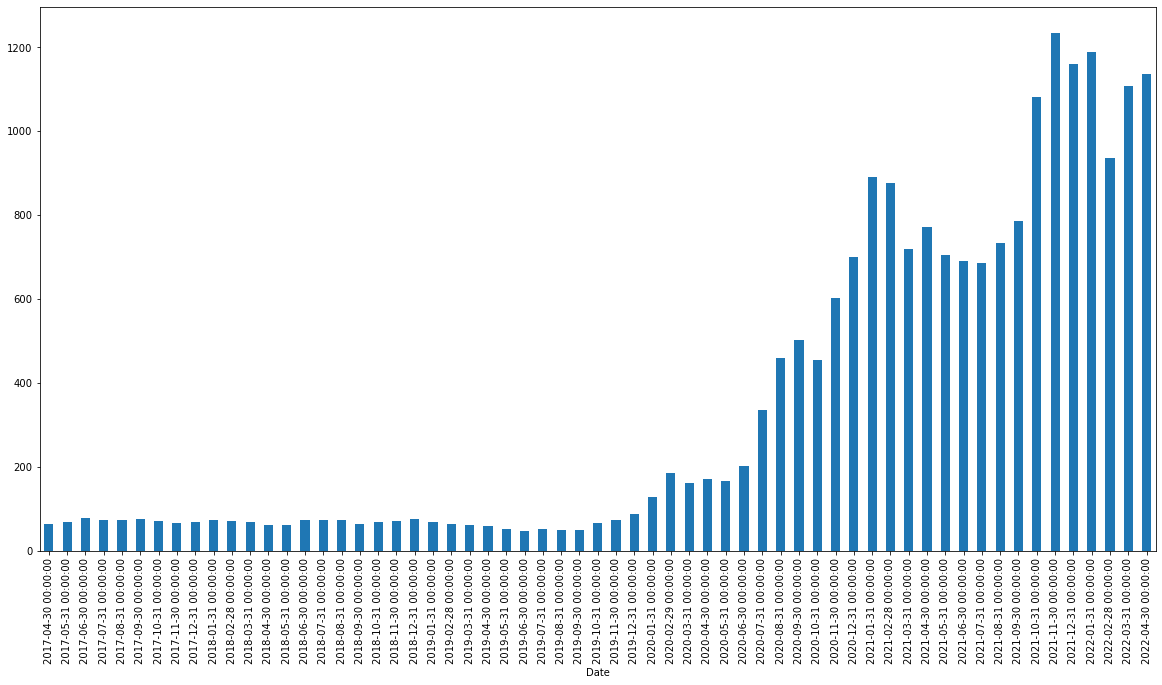

In [40]:
##resampling monthly
tesla_df.resample(rule='M').max()
##resampling quartely
tesla_df['Open'].resample(rule='QS').min()
##resamping daily
tesla_df['Open'].resample(rule='M').max().plot(kind='bar',figsize=(20,10))


In [45]:
tesla_df['Open'].rolling(11).mean().head(12)

Date
2017-04-18          NaN
2017-04-19          NaN
2017-04-20          NaN
2017-04-21          NaN
2017-04-24          NaN
2017-04-25          NaN
2017-04-26          NaN
2017-04-27          NaN
2017-04-28          NaN
2017-05-01          NaN
2017-05-02    61.830182
2017-05-03    62.156910
Name: Open, dtype: float64

<AxesSubplot:xlabel='Date'>

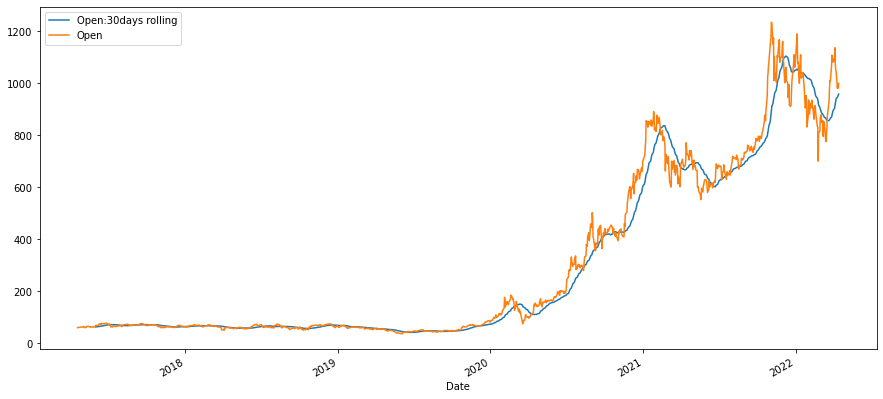

In [48]:
tesla_df['Open:30days rolling']=tesla_df['Open'].rolling(30).mean()
tesla_df[['Open:30days rolling','Open']].plot(figsize=(15,7))